## Analyzing CIA Factbook Data Using SQLite and Python

The CIA World Factbook is a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- `population` - The population as of 2015 .
- `population_growth` - The annual population growth rate, as a percentage.
- `area` - The total land and water area.

The data `factbook.db` can be gotten from this [link](https://github.com/makozi/Analyzing-CIA-Factbook-Data-Using-SQLite-and-Python/blob/master/factbook.db)

In [1]:
import sqlite3
import pandas as pd
conn= sqlite3.connect('factbook.db')
q= "SELECT  * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [2]:
cursor= conn.cursor()
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

 #### Let's run another query that returns the first 5 rows of the facts table in the database.

In [3]:
q1= "SELECT * FROM facts limit 5"
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


Here are the descriptions for some of the columns:

- `name` - The name of the country.
- `area` - The total land and sea area of the country.
- `population` - The country's population.
- `population_growth` - The country's population growth as a percentage.
- `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.
- `death_rate` - The country's death rate, or the number of death a year per 1,000 people.
- `area `- The country's total area (both land and water).
- `area_land` - The country's land area in square kilometers.
- `area_water` - The country's waterarea in square kilometers.





## Summary Statistics

Writing a single query that returns the following:
- Minimum population
- Maximum population
- Minimum population growth
- Maximum population growth

In [5]:
q2= '''
    select min(population) min_pop, max(population) max_pop, min(population_growth) min_pop_growth, max(population_growth) max_pop_growth from facts
'''
pd.read_sql_query(q2, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


From the table above:
- The Minimum population is 0
- Maximum population is 7256490011 (or more than 7.2 billion people)
- Minimum population growth is 0.0
- Maximum population growth is  4.02




## Outliers


- Writng  a query that returns the countrie(s) with a population of 7256490011 .


In [8]:
q3= '''
    SELECT * FROM facts WHERE population==(SELECT max(population) FROM facts)
'''

pd.read_sql_query(q3,conn)


,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


From the data above, the population of the `World` is 7256490011 (or more than 7.2 billion people)






- Writing a query that returns the countrie(s) with a population of 0:




In [12]:
q4= ''' 

select * from facts where population==(select min(population) from facts)
'''

pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


From the data above, Antarctica has the minimum population which is 0

## Histogram

Moving on to generating histograms for the rest of the countries in the table, ignoring these 2 rows. I will write a query that returns all of the values in the columns I want to visualize.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000092CC71BEB8>,
      dtype=object)

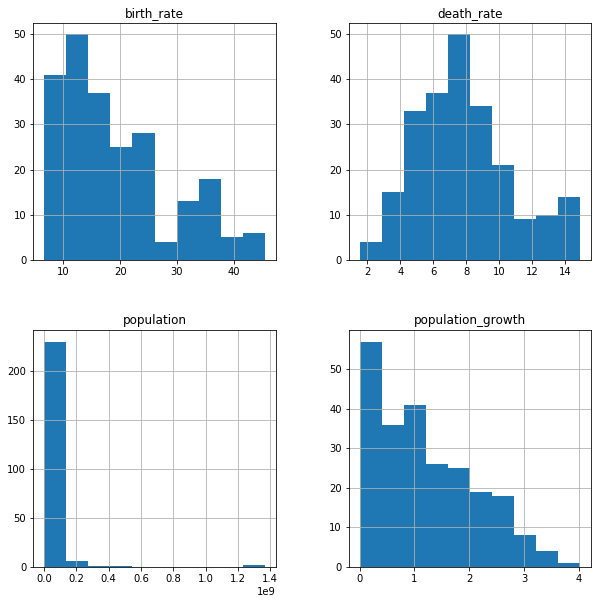

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q5 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q5, conn).hist(ax=ax)

## Countries with the highest population density

In [15]:
q6='''
select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20
'''
pd.read_sql_query(q6, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


Macau has the highest population density